In [1]:
# A program that uses Natural Language Processing to try to decipher whether emails are SPAM or not
# Utilizes a Bag of Words method and vectorizes each word with CountVectorizer
# Incorporates the removal of punctional and stop words to better help our NLP processor
#



In [2]:
# IMPORT NATURAL LANGUAGE TOOL KIT LIBRARY
import nltk

In [3]:
#nltk.download_shell()

In [4]:
# RSTRIP() is a method that strips strings from a text.  Break is where there is more than one white space
# Use list notation to get every entry in the file and turn into a list

messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]

In [5]:
# Look a the first message

messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [6]:
# Check how many messages there are 

print(len(messages))

5574


In [7]:
# Look at the 57th entry

messages[56]

'spam\tCongrats! 1 year special cinema pass for 2 is yours. call 09061209465 now! C Suprman V, Matrix3, StarWars3, etc all 4 FREE! bx420-ip4-5we. 150pm. Dont miss out!'

In [8]:
# Look at how data is entered into the fle 

for mess_no,message in enumerate(messages[:10]):
    print(mess_no,message)
    print('/n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
/n
1 ham	Ok lar... Joking wif u oni...
/n
2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
/n
3 ham	U dun say so early hor... U c already then say...
/n
4 ham	Nah I don't think he goes to usf, he lives around here though
/n
5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv
/n
6 ham	Even my brother is not like to speak with me. They treat me like aids patent.
/n
7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune
/n
8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. C

In [9]:
# NOTE that the messages are seperated by a \t to show spam/ham label and the message
messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [10]:
# Put the data into a pandas database
import pandas as pd

#Use pandas to seperate this tab out into A DATAFRAME
messages = pd.read_csv('smsspamcollection/SMSSpamCollection', sep='\t', names =['label','message'])

In [17]:
messages.head(10)

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147
6,ham,Even my brother is not like to speak with me. ...,77
7,ham,As per your request 'Melle Melle (Oru Minnamin...,160
8,spam,WINNER!! As a valued network customer you have...,157
9,spam,Had your mobile 11 months or more? U R entitle...,154


In [18]:
#lets look at some statistical data
messages.describe()

,length
count,5572.000000
mean,80.489950
std,59.942907
min,2.000000
25%,36.000000
50%,62.000000
75%,122.000000
max,910.000000


In [19]:
# higher level view to get an idea what seperates a ham vs a spam message
messages.groupby('label').describe()

length                                                         
        count        mean        std   min    25%    50%    75%    max
label                                                                 
ham    4825.0   71.482487  58.440652   2.0   33.0   52.0   93.0  910.0
spam    747.0  138.670683  28.873603  13.0  133.0  149.0  157.0  223.0

In [20]:
# most popular ham message is 'sorry i'll call later'
# most popuplar spam message is 'Please call our customer service...'

In [21]:
#Feature engineering!!  Get a better idea of the data, better understanding and you'll be able to add features

#check to see how long messages are:

messages['length'] = messages['message'].apply(len)

In [22]:
messages.head(10)

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147
6,ham,Even my brother is not like to speak with me. ...,77
7,ham,As per your request 'Melle Melle (Oru Minnamin...,160
8,spam,WINNER!! As a valued network customer you have...,157
9,spam,Had your mobile 11 months or more? U R entitle...,154


In [23]:
# Plot up some of the features

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

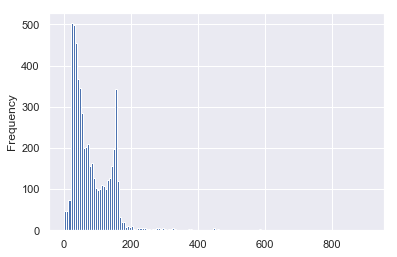

In [24]:
messages['length'].plot.hist(bins=150)

In [25]:
#bi-model pattern in the length of messages, must investigate further

messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [26]:
#try to find the max message

messages[messages['length']==910]

,label,message,length
1085,ham,For me the love should start with attraction.i...,910


In [27]:
#get the full message
messages[messages['length']==910]['message']

1085    For me the love should start with attraction.i...
Name: message, dtype: object

In [28]:
# get the full message by calling the iloc of the first iteration

messages[messages['length']==910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001AB90088208>,
      dtype=object)

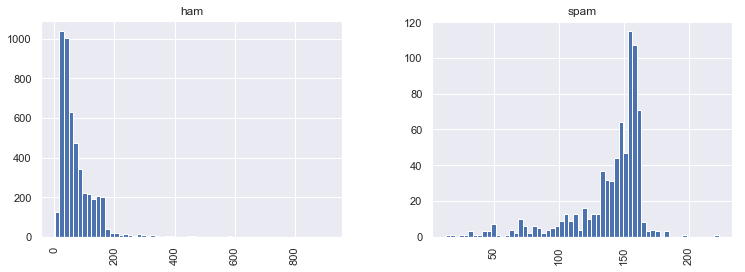

In [29]:
#crazy love letter... will see if message length has anything to do with spam

messages.hist(column='length',by='label',bins=60,figsize=(12,4))

In [30]:
#Since every word is in string, we need to change words to integers using Bag of Words 
# turns a sequence of characters into numbers 
# remove common words in the nltk library: the, a, puncuation

In [31]:
# STRING LIBRARY HAS THE PUNCUTATION CALLS

import string

In [32]:
#remove punctuation
mess = 'Sample message! Notice: it has punctutation.'

In [33]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [34]:
#list comprehension to remove punctuation

nopunc = [c for c in mess if c not in string.punctuation]

In [35]:
nopunc

['S',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 'm',
 'e',
 's',
 's',
 'a',
 'g',
 'e',
 ' ',
 'N',
 'o',
 't',
 'i',
 'c',
 'e',
 ' ',
 'i',
 't',
 ' ',
 'h',
 'a',
 's',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 't',
 'a',
 't',
 'i',
 'o',
 'n']

In [36]:
#REMOVE ENGLISH STOP WORDS: words that don't tell you anything about features...  WORDS THAT ARE way too common 

from nltk.corpus import stopwords

In [37]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [38]:
#turn nopunc back into words
nopunc = ''.join(nopunc)

In [39]:
nopunc

'Sample message Notice it has punctutation'

In [40]:
#split nopunc back into a individual words and take out the stopwords
nopunc.split()

['Sample', 'message', 'Notice', 'it', 'has', 'punctutation']

In [41]:
# apply the stop words to our TEST string
# iterate through, give me word in word of nopunc.split() if the lower case of the word is not in the stopwords list
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [42]:
# We removed it and has
clean_mess

['Sample', 'message', 'Notice', 'punctutation']

In [43]:
# Define a function that takes care of all this for our dataframe of spam and ham

def text_process(mess):
    """"
    1. remove punc
    2. remove stop words
    3. return list of clean text words
    """
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [44]:
#NOW apply the function to the column

In [45]:
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [46]:
# PLENTY of other ways to normalize text data.  NLTK library
# stemming: gets rid of similar words - running, ran or run
# NLTK comes with some libraries like this.... but it struggles with short hand which we have a lot in here, txt msgs, etc

In [47]:
# Time to vectorize our list of strings

from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
#bag of words transformer

bow_transformer = CountVectorizer(analyzer = text_process).fit(messages['message'])

In [ ]:
#show how many words in this giant matrix - looks like around 11 thousand
print(len(bow_transformer.vocabulary_))

In [50]:
# look at one sample word message, for example the 4th message

mess4 =messages['message'][3]

In [51]:
print(mess4)

U dun say so early hor... U c already then say...


In [52]:
bow4 = bow_transformer.transform([mess4])

In [53]:
print(bow4) # see that two words show up twice - 'say' and 'U'

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [79]:
print(bow4.shape)

(1, 11425)


In [80]:
#can get the words that show up twice by indexing, in mess4 the word 'say' shows up twice

bow_transformer.get_feature_names()[9554]

'say'

In [82]:
# Can check out the size of the massive sparse matrix
messages_bow = bow_transformer.transform(messages['message'])

In [83]:
print('Shape of the Sparse Matrix: ',messages_bow.shape)

Shape of the Sparse Matrix:  (5572, 11425)


In [84]:
#Find the amount of non-zero occurences
messages_bow.nnz

50548

In [87]:
# Can find out the sparsity of this matrix

sparsity = (100 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format(round(sparsity,6)))

sparsity: 0.079403


In [88]:
# Import a popular Tfidf transormaer 
# term frequency, inverse document frequency... applying weights to certain words and how often they are used throughout
# the messages 

from sklearn.feature_extraction.text import TfidfTransformer

In [89]:
# Create an instance of Tfidf

tfidf_transformer = TfidfTransformer()

In [90]:
# Fit our vectorized matrix

tfidf_transformer.fit(messages_bow)

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)

In [91]:
#look at the 4th message again

tfidf4 = tfidf_transformer.transform(bow4)

In [92]:
#now you have the weighted values of the words in message number 4

print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [93]:
# check a randomly chosen word like university to see the document frequency

tfidf_transformer.idf_[bow_transformer.vocabulary_['university']]

8.527076498901426

In [94]:
# Now convert entire BOW corpus into a tfdf corpus

messages_tfidf = tfidf_transformer.transform(messages_bow)

In [95]:
# now use a Naive Bayesian classifier, which uses probably that word is associated with a certain label

from sklearn.naive_bayes import MultinomialNB

In [96]:
spam_detect_model = MultinomialNB().fit(messages_tfidf,messages['label'])

In [97]:
# now check a message based on using naive bayes to predict

spam_detect_model.predict(tfidf4)

array(['ham'], dtype='<U4')

In [98]:
messages['label'][3]

'ham'

In [99]:
#predict all the messages
all_pred = spam_detect_model.predict(messages_tfidf)

In [100]:
all_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [101]:
# we predicted our algorithm on all our data, we didn't split up the model.  Use Train-test split

from sklearn.model_selection import train_test_split

In [102]:
msg_train,msg_test,label_train,label_test = train_test_split(messages['message'],messages['label'],test_size=0.3)

In [103]:
# WE are just grabbing the text messages right now, not the bow and tdifd.  This is such a common feature that scikit learn
# has a built in pipeline feature.  Saves a lot of time.

In [104]:
from sklearn.pipeline import Pipeline

In [105]:
#pipeline passes in a list of operations you want to complete

pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
])

In [107]:
# Now can pass in message text data and the pipeline will do all the work for us. 
# Treat pipeline model as a normal estimator

pipeline.fit(msg_train,label_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x0000023A29507400>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocesso...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [108]:
# Take a look at how our model did

predictions = pipeline.predict(msg_test)

In [109]:
from sklearn.metrics import classification_report

In [110]:
print(classification_report(label_test,predictions))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1457
        spam       1.00      0.72      0.83       215

   micro avg       0.96      0.96      0.96      1672
   macro avg       0.98      0.86      0.91      1672
weighted avg       0.96      0.96      0.96      1672



In [ ]:
#  MODEL Does very well in predicting a real message vs. a spam message !!!